In [1]:
using SX, Reachability
using Plots

In [3]:
file = "buildr_6_flat.xml"
H = readsxmodel(file, ST=ConstrainedLinearControlContinuousSystem)

[warn | Reachability]: field note in location 1 is ignored


Hybrid System with automaton HybridSystems.LightAutomaton{LightGraphs.SimpleGraphs.SimpleDiGraph{Int64},LightGraphs.SimpleGraphs.SimpleEdge{Int64}}({1, 0} directed simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Int64}())

In [4]:
S = ConstrainedLinearControlContinuousSystem(H.modes[1].A[1:6, 1:6], eye(6), nothing, ConstantInput(H.modes[1].B[1:6] * H.modes[1].U[1]))

initially = " x1 >= 0.0060145 & x1 <= 0.0115005 & x2 >= -0.0009624 & x2 <= 0.0025689 & x3 >= 0.0177578 & x3 <= 0.0257479 & x4 >= -0.0047553 & x4 <= -0.0001524 & x5 >= 0.0177717 & x5 <= 0.0371327 & x6 >= -0.0122932 & x6 <= -0.0046144 & y1 >= -0.0008518 & y1 <= 0.0001322 & u1 >= 0.8000000 & u1 <= 1.0000000 & t==0 & stoptime == 20.00"
f = i -> SX.parse_sxmath(initially)[i].args[3]
X0 = Hyperrectangle(low=[f(i) for i in 1:2:12], high=[f(i) for i in 2:2:12])

problem = InitialValueProblem(S, X0);

In [5]:
sol = solve(problem, :T=>5.0, :δ=>0.01, :vars=>[6], :verbosity=>1);

[info] Time discretization...
[info] elapsed time: 2.218196301 seconds
[info] Reachable States Computation...
[info] - Decomposing X0
[info] elapsed time: 0.729877511 seconds
[info] - Computing successors
[info] elapsed time: 1.539644243 seconds
[info] - Total
[info] elapsed time: 3.495016658 seconds
[info] Projection...
true
2
[info] elapsed time: 0.415259694 seconds


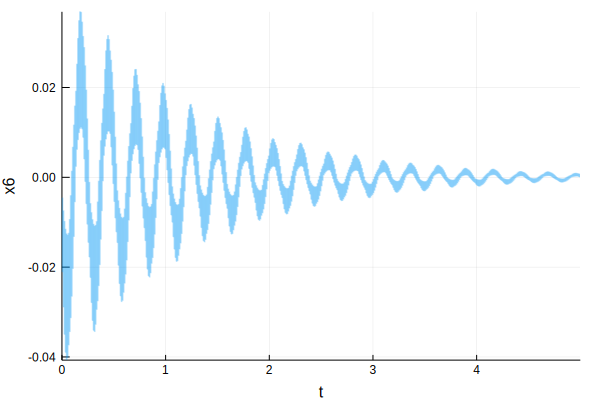

In [6]:
plot(sol, alpha=0.2)

Now compute the output $y_1$:

In [15]:
vars = collect(keys(H.ext[:variables]))[1:6]
expr = SX.parse_sxmath("y1 == 0.064531*x2 - 0.0061322*x1 - 0.00069603*x3 - 0.062226*x4 - 0.0035048*x5 + 0.047228*x6")
Y1 = convert(Vector{Float64}, diff.(convert(Basic, expr[1].args[2]), vars))
Y1 = sparse(reshape(Y1, (1, 6)))

# (first input in plot_vars measn time; second input is ignored if projection matrix is passed)
sol = solve(problem, :T=>5.0, :δ=>0.01, :plot_vars=>[0, 1], :vars=>1:6, :verbosity=>1, :projection_matrix=>Y1);

[info] Time discretization...
[info] elapsed time: 0.00034448 seconds
[info] Reachable States Computation...
[info] - Decomposing X0
[info] elapsed time: 0.000148406 seconds
[info] - Computing successors
[info] elapsed time: 0.105461018 seconds
[info] - Total
[info] elapsed time: 0.107596025 seconds
[info] Projection...
true
7

  [1, 1]  =  -0.0061322
  [1, 2]  =  0.064531
  [1, 3]  =  -0.00069603
  [1, 4]  =  -0.062226
  [1, 5]  =  -0.0035048
  [1, 6]  =  0.047228
[info] elapsed time: 0.014321987 seconds


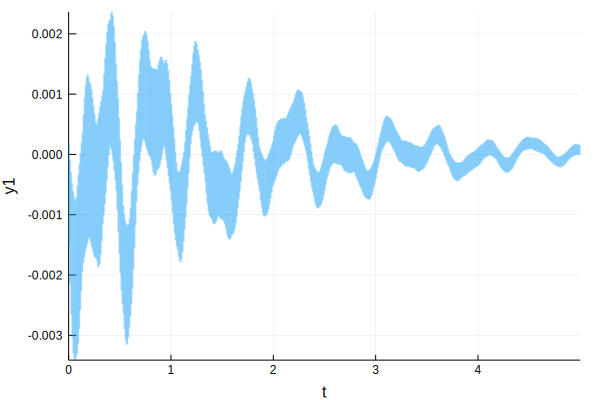

In [16]:
plot(sol, alpha=0.2, xlabel="t", ylabel="y1")